# **Animal Competition (30%)**
For the non-competition mode, we will use the Animal (https://cloudstor.aarnet.edu.au/plus/s/cZYtNAeVhWD6uBX) dataset. This dataset contains images of 151 different animals. 

The dataset contains a total of 6270 images corresponding to the name of animal types.

All images are RGB images of 224 pixels wide by 224 pixels high in .jpg format. The images are separated in 151 folders according to their respective class.

The task is to categorize each animal into one of 151 categories. 

We provide a baseline by the following steps:


*   Loding and Analysing the dataset using torchvision.
*   Defining a simple convolutional neural network. 
*   How to use existing loss function for the model learning. 
*   Train the network on the training data. 
*   Test the trained network on the testing data. 

The following trick/tweak(s) could be considered:

Please note that if you employ transfer learning, please conduct experiments on with and without pre-trained weights. Please try to turn the parameters (training parameters, augmentation, loss function...) after you change the network.


-------
1. Transfer Learning
2. Change of advanced training parameters: Learning Rate, Optimizer, Batch-size, Number of Max Epochs, and Drop-out. 
3. Use of a new loss function.
4. Data augmentation
5. Architectural Changes: Batch Normalization, Residual layers, Attention Block, and other varients.
6. Others

Your code should be modified from the provided baseline. A pdf report is required to explain the tricks you employed, and the imporvements they achieved.
Marking Rules:
-------
We will mark the resykts based on the final test accuracy on testing images and your report.

Final mark = acc_mark + efficiency mark + report mark + bonus mark


We have two mark rules for acc and efficiency. You will get the higher one based on the results. For example, if you rank top 20%, but you only achieve 80% accuracy, you will get 10 points. If you rank 60%, but you get 95% accuracy, you will also get 10 points.


###Acc_mark 15:



|Accuracy|Mark|
|---|---|
| >95%|          10|
|>85%|         8|
|>75%  |        6|
|>65%  |      4|
|>55%  |      2|
|Not implemented| 0|


|Accuracy|Mark|
|---|---|
| Top 20% in the class|          10|
|20%-40%|         8|
|40%-60%  |        6|
| 60%-80%  |      4|
| 80%-100%  |      2|
|Not implemented| 0|




###Efficiency mark 5:

Efficiency is evaluated by the computational costs (flops: https://en.wikipedia.org/wiki/FLOPS). Please report the computational costs for your final model and attach the code/process about how you calculate it.

|Efficiency|Mark|
|---|---|
|<0.69G|          5|
|<1 G|         4|
|<5 G  |        3|
|<10 G |      2|
|<20 G  |      1|
|Not implemented| 0|


|Efficiency|Mark|
|---|---|
| Top 20% in the class|          5|
|20%-40%|         4|
|40%-60%  |        3|
| 60%-80%  |      2|
| 80%-100%  |      1|
|Not implemented| 0|



###Report mark 15:
1. Introduction and your understanding to the baseline model: 1 points

2.Detailed explainsations on the methods.: 5 points

Clearly explain the reference, motivation and design choice for each trick/tweak(s). Providing the experimental results in tables.
Example table:

|Trick1|Trick2|Trick3|Accuracy|
|---|---|---|---|
|N|N|N|60%|
|Y|N|N|65%|
|Y|Y|N|77%|
|Y|Y|Y|82%|

Observation and discussion based on the experiment results.

3. Expaination of the methods on reducing the computational cost and/or improve the trade-off between accuracy and efficiency: 3 points

4. Explaination of the code implementation：3 points

5. Visulization results: e.g. training and testing accuracy/loss for each model, faliure case studies: 2 points

6. Open ended:  Limitations, conclusions, failure cases analysis...: 1 points

###Bouns mark:
1. Top one result: 1 points
2. Fancy designs: 1 points



In [ ]:
##################################################################################################################################
### Subject: Computer Vision 
### Year: 2022
### Student Name: Camille Ko, Lipin Guo
### Student ID: a123456, a654321
### Comptetion Name: Animal Classification Competition
### Final Results:
### ACC: 98.28%        FLOPs:0.43G
##################################################################################################################################

In [ ]:
# Importing libraries. 

import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm.notebook import tqdm

# To avoid non-essential warnings 
import warnings
warnings.filterwarnings('ignore')

from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Mounting G-Drive to get your dataset. 
# To access Google Colab GPU; Go To: Edit >>> Netebook Settings >>> Hardware Accelarator: Select GPU. 
# Reference: https://towardsdatascience.com/google-colab-import-and-export-datasets-eccf801e2971 
from google.colab import drive
drive.mount('/content/drive')

# Dataset path. You should change the dataset path to the location that you place the data.
data_dir = '/content/drive/MyDrive/dataset/dataset/'
classes = os.listdir(data_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Performing Image Transformations. 
##Hints: Data Augmentation can be applied here. Have a look on RandomFlip, RandomRotation...
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])


# train_tfms = T.Compose([
#     #T.RandomCrop(256, padding=8, padding_mode='reflect'),
#      #T.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
#     #T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
#     T.Resize((256, 256)), del
#     T.RandomRotation(10), 
#     T.ToTensor(), 
#      T.Normalize(*imagenet_stats,inplace=True), 
#     #T.RandomErasing(inplace=True)
# ])



In [ ]:
# Checking the dataset training size.
dataset = ImageFolder(data_dir, transform=train_transform)
print('Size of training dataset :', len(dataset))

Size of training dataset : 6270


In [ ]:
# Viewing one of images shape.
img, label = dataset[100]
print(img.shape)

torch.Size([3, 224, 224])


In [ ]:
# Preview one of the images..
def show_image(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1,2,0))

Label:  ailurus-fulgens (5)


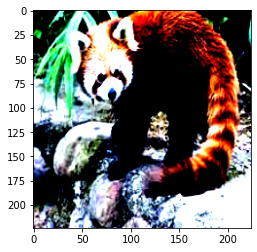

In [ ]:
show_image(*dataset[200])

In [ ]:
# Setting seed so that value won't change everytime. 
# Splitting the dataset to training, validation, and testing category.
torch.manual_seed(10)
val_size = len(dataset)//20
test_size = len(dataset)//10
train_size = len(dataset) - val_size - test_size

In [ ]:
# Random Splitting. 
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])
len(train_ds), len(val_ds),len(test_ds)  

(5330, 313, 627)

In [ ]:
batch_size = 32 #change batch_size
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size, num_workers=2, pin_memory=True)

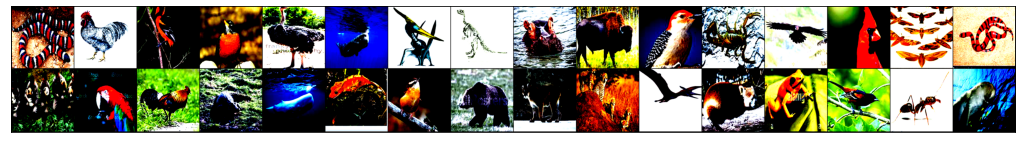

In [ ]:
# Multiple images preview. 
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

In [ ]:
 # Baseline model class for training and validation purpose. Evaluation metric function - Accuracy.
def accuracy(output, target, topk=(1,)):
    """
    Computes the accuracy over the k top predictions for the specified values of k
    In top-3 accuracy you give yourself credit for having the right answer
    if the right answer appears in your top five guesses.
    """
    with torch.no_grad():
        maxk = 3
        batch_size = target.size(0)

        # st()
        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        # st()
        # correct = pred.eq(target.view(1, -1).expand_as(pred))
        # correct = (pred == target.view(1, -1).expand_as(pred))
        correct = (pred == target.unsqueeze(dim=0)).expand_as(pred)



        correct_3 = correct[:3].reshape(-1).float().sum(0, keepdim=True)

        return correct_3.mul_(1.0 / batch_size)
#def accuracy(outputs, labels):
 #   _, preds = torch.max(outputs, dim=1)
  #  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss, Hints: the loss function can be changed to improve the accuracy #change
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels, (5))           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
 # To check wether Google Colab GPU has been assigned/not. 

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return None
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [1]:
device = get_default_device()
device
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

NameError: name 'get_default_device' is not defined

In [ ]:
# input_size = 3*112*112
# output_size = 151

In [ ]:
# Convolutional Network - mobilenet_v3
class CnnModel_mobilenet_v3(ImageClassificationBase):
    def __init__(self, classes):
        super().__init__()
        self.num_classes=classes
        # Use a pretrained model
        self.network = models.mobilenet_v3_large(pretrained=True)
        # set_parameter_requires_grad(model, feature_extract)
        # Replace last layer
        # num_ftrs = self.network.fc.in_features
        # self.network.fc = nn.Linear(num_ftrs, self.num_classes)
        self.network.classifier[3] = nn.Linear(in_features=self.network.classifier[3].in_features, out_features=self.num_classes)
    
    def forward(self, x):
        return self.network(x)

In [ ]:
# Model print
num_classes = 151
model = CnnModel_mobilenet_v3(num_classes)
model.cuda()
print(model)

CnnModel_mobilenet_v3(
  (network): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          )
        )
      )
      (2): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNor

In [ ]:
# We can check the input and the output shape
for images, labels in train_loader:
    out = model(images)
    print('images.shape:', images.shape)    
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([32, 3, 224, 224])
out.shape: torch.Size([32, 151])
out[0]: tensor([ 1.9647e-01, -4.9309e-01,  1.3988e-01,  5.7663e-01, -3.6883e-01,
         1.8490e-01, -3.2435e-02,  5.8324e-02, -4.0445e-01, -2.2113e-01,
        -1.6741e-01, -1.2874e-01, -4.0416e-01,  8.3494e-01,  2.1449e-01,
        -9.2122e-02, -1.8388e-01, -2.7634e-01, -6.3078e-01, -1.9441e-01,
        -1.1395e-01, -1.6773e-01, -4.9412e-02,  2.9103e-01, -2.8391e-02,
         7.1637e-01, -4.5992e-01,  1.8237e-01,  8.2579e-01, -7.1691e-02,
        -7.2369e-01,  5.1627e-02,  4.0591e-01, -1.1021e-01, -2.2671e-01,
         1.1619e-01,  1.0076e-01,  2.4934e-01, -3.4078e-01, -8.1896e-01,
         1.4943e-01, -7.0233e-01,  3.7985e-01, -4.0211e-01,  2.6563e-01,
        -1.8171e-01, -1.1032e-01, -1.8568e-02,  2.3219e-01, -7.7606e-02,
         6.3025e-02,  2.1925e-01,  1.7274e-01, -7.8703e-02, -5.5191e-01,
        -3.7366e-01,  1.4323e-01,  1.4145e-01,  2.5347e-01,  1.8286e-01,
         2.4789e-01, -4.2543e-01, -4.56

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model, device)

CnnModel_mobilenet_v3(
  (network): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          )
        )
      )
      (2): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNor

In [ ]:
# Functions for evaluation and training.

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr) #change eg. SGD...
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch) #change
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(model, device)

In [ ]:
history=[evaluate(model, val_loader)]
history

[{'val_acc': 0.012500000186264515, 'val_loss': 5.094099521636963}]

In [ ]:
# Hints: The following parameters can be changed to improve the accuracy
print(test_size)
num_epochs = 20 # changed from 10 to 50
opt_func = torch.optim.SGD #
lr = 0.01 # changed from 0.001

627


In [ ]:
history+= fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [0], train_loss: 4.4167, val_loss: 3.4859, val_acc: 0.6319


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [1], train_loss: 2.7055, val_loss: 2.0521, val_acc: 0.8019


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [2], train_loss: 1.5273, val_loss: 1.2837, val_acc: 0.8960


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.9596, val_loss: 0.9644, val_acc: 0.9241


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.6535, val_loss: 0.7864, val_acc: 0.9366


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.4939, val_loss: 0.6663, val_acc: 0.9491


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.3756, val_loss: 0.6253, val_acc: 0.9460


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.3066, val_loss: 0.5877, val_acc: 0.9523


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.2481, val_loss: 0.5649, val_acc: 0.9554


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.1986, val_loss: 0.5376, val_acc: 0.9647


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [10], train_loss: 0.1696, val_loss: 0.5112, val_acc: 0.9647


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [11], train_loss: 0.1427, val_loss: 0.4975, val_acc: 0.9639


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [12], train_loss: 0.1314, val_loss: 0.4969, val_acc: 0.9639


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [13], train_loss: 0.1075, val_loss: 0.4878, val_acc: 0.9608


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [14], train_loss: 0.0951, val_loss: 0.4870, val_acc: 0.9639


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [15], train_loss: 0.0811, val_loss: 0.4843, val_acc: 0.9608


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [16], train_loss: 0.0772, val_loss: 0.4710, val_acc: 0.9647


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [17], train_loss: 0.0654, val_loss: 0.4703, val_acc: 0.9647


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [18], train_loss: 0.0585, val_loss: 0.4703, val_acc: 0.9679


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [19], train_loss: 0.0547, val_loss: 0.4690, val_acc: 0.9608


In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')
    plt.show()
    
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')
    plt.show()

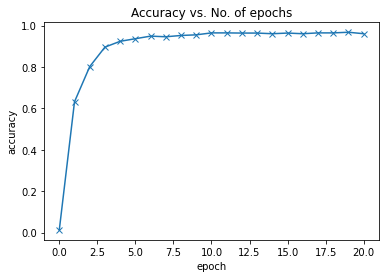

In [ ]:
plot_accuracies(history)

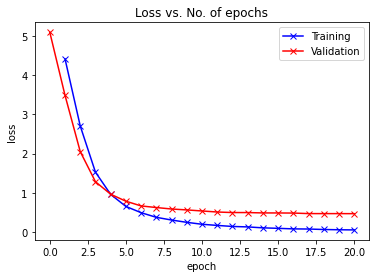

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model, test_loader)

{'val_acc': 0.9765625, 'val_loss': 0.3132080137729645}

##FLOPs

In [ ]:
  #The code from https://cloudstor.aarnet.edu.au/plus/s/PcSc67ZncTSQP0E can be used to count flops
  #Download the code.
  !wget -c https://cloudstor.aarnet.edu.au/plus/s/hXo1dK9SZqiEVn9/download
  !mv download FLOPs_counter.py
  #!rm -rf download

--2022-08-13 02:26:57--  https://cloudstor.aarnet.edu.au/plus/s/hXo1dK9SZqiEVn9/download
Resolving cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)... 202.158.207.20
Connecting to cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)|202.158.207.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Syntax error in Set-Cookie: 5230042dc1897=7fkns0uig4jsltsjr6taag482i; path=/plus;; Secure at position 53.
Syntax error in Set-Cookie: oc_sessionPassphrase=7Ke5RdyC%2FPTi3b0A7q2MNC8e1VyBSSB%2BkdDRwBYvZoEnjPZszdBENX3FZ9lQeb4Su9zKhZeM6YGAi%2B6YOuimcKyoC%2BR7YxIWPOu2ipAczL8jfwdNsz4np8M3Pn9hjzUn; expires=Sun, 14-Aug-2022 02:26:59 GMT; Max-Age=86400; path=/plus;; Secure at position 224.
Length: 5201 (5.1K) [text/x-python]
Saving to: ‘download’

download            100%[===================>]   5.08K  --.-KB/s    in 0s      

2022-08-13 02:26:59 (594 MB/s) - ‘download’ saved [5201/5201]



In [ ]:
from FLOPs_counter import print_model_parm_flops
input = torch.randn(1, 3, 224, 224) # The input size should be the same as the size that you put into your model 
#Get the network and its FLOPs
num_classes = 151
model = CnnModel_mobilenet_v3(num_classes)
print_model_parm_flops(model, input, detail=False)

 + Number of FLOPs: 0.43G




# Experiment 1: using lr = 0.001, opt_func = SGD

In [ ]:
model1 = CnnModel_mobilenet_v3(num_classes)
model1 = to_device(model1, device)
history1=[evaluate(model1, val_loader)]
print(history1)
print(test_size)

[{'val_loss': 5.099582195281982, 'val_acc': 0.02187499962747097}]
627


In [ ]:
num_epochs = 20
opt_func1 = torch.optim.SGD
lr1 = 0.001

In [ ]:
history1+= fit(num_epochs, lr1, model1, train_dl, val_dl, opt_func1)

  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [0], train_loss: 5.0314, val_loss: 4.9362, val_acc: 0.0469


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [1], train_loss: 4.8905, val_loss: 4.8037, val_acc: 0.1214


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [2], train_loss: 4.7463, val_loss: 4.6708, val_acc: 0.2115


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [3], train_loss: 4.6031, val_loss: 4.5346, val_acc: 0.3124


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [4], train_loss: 4.4548, val_loss: 4.3891, val_acc: 0.3758


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [5], train_loss: 4.2945, val_loss: 4.2407, val_acc: 0.4400


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [6], train_loss: 4.1275, val_loss: 4.0774, val_acc: 0.5190


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [7], train_loss: 3.9448, val_loss: 3.9033, val_acc: 0.5815


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [8], train_loss: 3.7591, val_loss: 3.7291, val_acc: 0.6159


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [9], train_loss: 3.5593, val_loss: 3.5407, val_acc: 0.6395


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [10], train_loss: 3.3655, val_loss: 3.3524, val_acc: 0.6734


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [11], train_loss: 3.1711, val_loss: 3.1781, val_acc: 0.6921


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [12], train_loss: 2.9900, val_loss: 2.9988, val_acc: 0.7118


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [13], train_loss: 2.8168, val_loss: 2.8318, val_acc: 0.7211


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [14], train_loss: 2.6497, val_loss: 2.6841, val_acc: 0.7604


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [15], train_loss: 2.4734, val_loss: 2.5282, val_acc: 0.7760


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [16], train_loss: 2.3258, val_loss: 2.3796, val_acc: 0.8059


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [17], train_loss: 2.1905, val_loss: 2.2450, val_acc: 0.8121


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [18], train_loss: 2.0557, val_loss: 2.1272, val_acc: 0.8193


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [19], train_loss: 1.9351, val_loss: 2.0133, val_acc: 0.8380


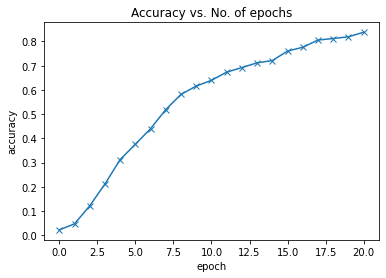

In [ ]:
plot_accuracies(history1)

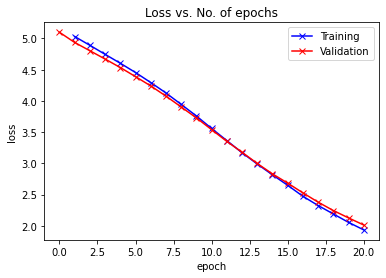

In [ ]:
plot_losses(history1)

In [ ]:
evaluate(model1, test_loader)

{'val_acc': 0.8541118502616882, 'val_loss': 1.9239174127578735}

In [ ]:
model1 = CnnModel_mobilenet_v3(num_classes)
print_model_parm_flops(model1, input, detail=False)

 + Number of FLOPs: 0.43G



# Experiment 4: using lr = 0.1, opt_func = SGD

In [ ]:
model4 = CnnModel_mobilenet_v3(num_classes)
model4 = to_device(model4, device)
history4=[evaluate(model4, val_loader)]
print(history4)
print(test_size)

[{'val_loss': 5.060370922088623, 'val_acc': 0.02812500111758709}]
627


In [ ]:

num_epochs = 20
opt_func4 = torch.optim.SGD
lr4 = 0.1


In [ ]:
history4+= fit(num_epochs, lr4, model4, train_dl, val_dl, opt_func4)


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [0], train_loss: 1.7529, val_loss: 0.7922, val_acc: 0.9429


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.3097, val_loss: 0.5818, val_acc: 0.9523


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.0890, val_loss: 0.4963, val_acc: 0.9679


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.0413, val_loss: 0.4091, val_acc: 0.9647


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.0185, val_loss: 0.4046, val_acc: 0.9679


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.0124, val_loss: 0.4054, val_acc: 0.9719


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.0121, val_loss: 0.4430, val_acc: 0.9701


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.0070, val_loss: 0.3812, val_acc: 0.9750


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.0058, val_loss: 0.4063, val_acc: 0.9647


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.0046, val_loss: 0.3972, val_acc: 0.9750


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [10], train_loss: 0.0047, val_loss: 0.4691, val_acc: 0.9647


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [11], train_loss: 0.0051, val_loss: 0.3773, val_acc: 0.9750


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [12], train_loss: 0.0041, val_loss: 0.3932, val_acc: 0.9750


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [13], train_loss: 0.0031, val_loss: 0.4152, val_acc: 0.9812


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [14], train_loss: 0.0033, val_loss: 0.4150, val_acc: 0.9812


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [15], train_loss: 0.0031, val_loss: 0.4084, val_acc: 0.9719


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [16], train_loss: 0.0029, val_loss: 0.4650, val_acc: 0.9719


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [17], train_loss: 0.0028, val_loss: 0.4353, val_acc: 0.9679


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [18], train_loss: 0.0026, val_loss: 0.4304, val_acc: 0.9679


  0%|          | 0/167 [00:00<?, ?it/s]

Epoch [19], train_loss: 0.0026, val_loss: 0.4249, val_acc: 0.9710


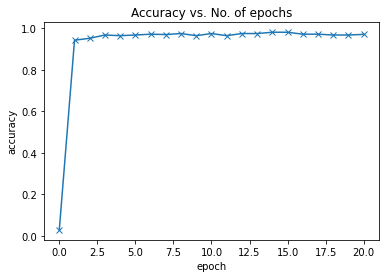

In [ ]:
plot_accuracies(history4)


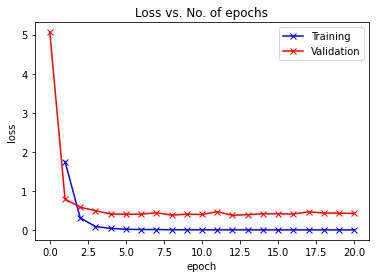

In [ ]:
plot_losses(history4)


In [ ]:
evaluate(model4, test_loader)


{'val_acc': 0.9828125238418579, 'val_loss': 0.2962758243083954}

In [ ]:
model4 = CnnModel_mobilenet_v3(num_classes)
print_model_parm_flops(model4, input, detail=False)

 + Number of FLOPs: 0.43G


In [ ]:
#incorrectly classifed

incorrect_examples = []
incorrect_labels = []
incorrect_pred = []
model.eval()
for data,target in test_loader:
  data , target = data.to(device), target.to(device)
  output = model(data) # shape = torch.Size([batch_size, 10])
  pred = output.argmax(dim=1, keepdim=True) #pred will be a 2d tensor of shape [batch_size,1]
  idxs_mask = ((pred == target.view_as(pred))==False).view(-1)
  if idxs_mask.numel(): #if index masks is non-empty append the correspoding data value in incorrect examples
    incorrect_examples.append(data[idxs_mask].squeeze().cpu().numpy())
    incorrect_labels.append(target[idxs_mask].cpu().numpy()) #the corresponding target to the misclassified image
    incorrect_pred.append(pred[idxs_mask].squeeze().cpu().numpy()) #the corresponiding predicted class of the misclassified image

